# <span style="color:darkblue"> Lecture 23 - Practicing Time and Plots  </span>

<font size = "5">

In  this lecture we will practice working with time in Python

- There will be a quiz on this lecture


# <span style="color:darkblue"> I. Review of time commands </span>

<font size = "5">

Line plot: $\qquad \qquad \qquad \quad \ $ ``` plt.plot() ```

Parse string column to date: $\ $``` pd.to_datetime(data_column,format)```

Date to string:  $\qquad \qquad \quad \ $ ```.dt.strftime(format)```

Group by time period:
$\qquad \ \ $ ``` pd.Grouper(key='date', freq='m')```

Include group as column: $\quad$ ```.reset_index()```

Difference between periods: $\ $``` .diff() ```

Lag a periods: $\qquad \qquad \quad \ $ ``` .shift(1) ```

Between two periods (bool): $\ $ ```.between("date1","date2")```

Convert wide to long: $\qquad \quad $ ``` pd.melt(...) ```

Convert long to wide: $\qquad \quad $ ``` pd.pivot(...) ```

## <span style="color:darkblue"> II. Quiz Structure </span>

<font size = "5">

The day of the quiz I will ...
- Provide a dataset with information
- Give more specific instructions.
- Below, you will see the type of questions that will be asked.
- The idea is for you to apply known concepts to new data
- You have 50 minutes to complete the assignment

Questions

(exact wording may change in quiz, but exercise will be very similar)

The quiz will use a time series dataset



<font size = "5">

(a) Import a dataset, parse date column using wildcards <br>
$\quad$ (see Lecture 21), and sort dataset




In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, time, datetime

#import
financial = pd.read_csv ( "data_raw/financial.csv" )

#parse
financial [ "date" ]    = pd.to_datetime ( financial [ "date_str" ] , format = "%Y-%m-%d" )
financial               = financial.sort_values ( "date" , ascending = True )


<font size = "5">

(b) Line plots from multiple columns with a legend


In [ ]:

# line plots with multiple columns (sp500 & djia)
financial [ [ "date" , "sp500" , "djia" ] ].set_index( "date" ).plot ( ) # double brackets: one to denote subset another to call list
plt.xlabel ( "Time" )
plt.ylabel ( "Value of Index Funds" )
# legend
plt.legend ( [ "S&P 500","Dow Jones" ] )


<font size = "5">

(c) Compute growth rates for a time series

In [ ]:

# compute difference
financial [ "diff_sp500" ] = financial [ "sp500" ].diff ( )
display ( financial [ [ "sp500", "diff_sp500" ] ] )

# find lag to get growth
financial [ "lag_sp500" ]    = financial[ "sp500" ].shift ( 1 )
financial [ "growth_sp500" ] = financial [ "diff_sp500" ] * 100 / financial [ "lag_sp500" ]

display ( financial [ [ "sp500" , "lag_sp500" , "diff_sp500" , "growth_sp500" ] ] )

# additional materials

# find difference between time ( days )
# financial [ "diff_date" ]  = financial [ "date" ] - financial [ "date" ].shift ( 1 )
# financial [ "count_days" ] = financial [ "diff_date" ].dt.days

# plot growth
# plt.plot( "date" , "growth_sp500" ,
          # data = financial.sort_values ( "date", ascending = True ) )
# plt.xlabel ( "Time" )
# plt.ylabel ( "Daily percentage change" )
# plt.title ( "Change in the S&P 500 Index" )


<font size = "5">

(d) Flag a subset of the data and produce a shaded plot <br>
$\quad$ as in Lecture 22



In [ ]:

# flag observation by creation bool statement

financial[ "positive_djia" ] = financial[ "growth_djia" ] > 4
financial[ "negative_djia" ] = financial[ "growth_djia" ] < -4


plt.plot    ( "date", "growth_djia", data = financial )
plt.xlabel  ( "Time" )
plt.ylabel  ( "Daily percentage change " )
plt.title   ( "Extreme Indexes of The Dow Jones" )

vec_y = financial[ "growth_djia" ]
plt.fill_between ( x= financial [ "date" ],
                 y1 = vec_y.min (),
                 y2 = vec_y.max (),
                 where = financial [ "positive_djia" ] | financial [ "negative_djia" ] ,
                 alpha = 0.2, color = "red" )

plt.show()


<font size = "5">

(e) Compute aggregate dataset by time period



Text(0.5, 1.0, 'Monthly average stock market performance')

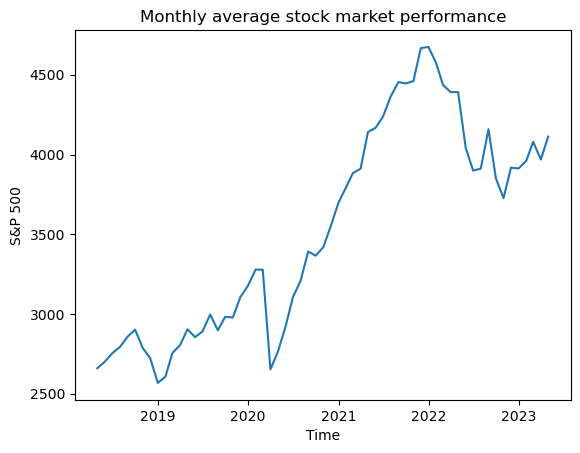

In [6]:

# configure data by time period
month_config = pd.Grouper( key = 'date', freq = 'm' )

# aggregate by period
monthlydata = ( financial
               .groupby( month_config ) 
               .agg( sp500_mean = ( "sp500","mean" ) )
               .reset_index ( ) )

# plot aggregate data
plt.plot( "date","sp500_mean" ,
          data = monthlydata.sort_values ( "date", ascending = True ) )
plt.xlabel( "Time" )
plt.ylabel( "S&P 500" )
plt.title ( "Monthly average stock market performance" ) 


<font size = "5">

(f) Convert a dataset to long format

In [ ]:

financial_long = pd.melt( financial,
                         var_name   = "portfolio_type",
                         value_name = "portfolio_value",
                         id_vars    = 'date',
                         value_vars = [ 'sp500','djia' ] )
